In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use("dark_background")
import seaborn as sns
import statsmodels.api as sm
import math
import warnings
warnings.filterwarnings('ignore')

# reviews_sample.columns.str.strip().str.lower().str.replace(' ', '_')

# 1. Load & Transform the Data [20 points]

## a) [15 points] 

In [12]:
# create a function 'load_Data' to load the data
def load_data():
    covid_raw = pd.read_csv("time_series_covid19_confirmed_global.csv", sep=",")
    covid_raw.columns.values[1] = ""
    covid_raw['cum_sum'] = covid_raw['8/21/20']
    covid_raw.sort_values(by=['cum_sum'], inplace=True, ascending=False)
    covid = covid_raw.head().T
    covid.columns = covid.iloc[1]
    covid = covid.iloc[4:-1]
    covid.index = pd.to_datetime(covid.index)
    # decrease each row from previous
    covid = covid.diff()
    # drop first row
    covid = covid.iloc[1:]
    return covid

covid = load_data()
covid

,US,Brazil,India,Russia,South Africa
2020-01-23,0,0,0,0,0
2020-01-24,1,0,0,0,0
2020-01-25,0,0,0,0,0
2020-01-26,3,0,0,0,0
2020-01-27,0,0,0,0,0
...,...,...,...,...,...
2020-08-17,35112,19373,55018,4839,2541
2020-08-18,44091,47784,64572,4718,2258
2020-08-19,47408,49298,69672,4790,3916
2020-08-20,44023,45323,68900,4767,3880


US, Brazil, India, Russia and South Africa are the top 5 countries with the most cumulative cases as of August 21, 2020, sorted in descending order.

## b) [5 points]

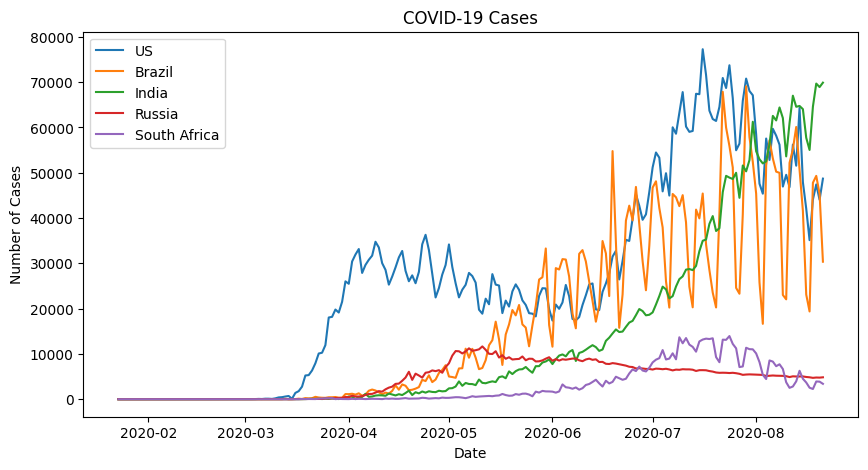

In [13]:
# create a function 'plot_data' to plot the data
def plot_data(covid):
    plt.figure(figsize=(10, 5))
    plt.plot(covid)
    plt.legend(covid.columns)
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.title("COVID-19 Cases")
    plt.show()


plot_data(covid)

We can see a considerable seasonal pattern for US and Brazil, but for India, Russia and South Africa, it is low.

# 2. Extract Seasonal Components [15 points]

## a) [10 points] 

In [14]:
# `seasonal_decompose` function from the `statsmodels` package
def sea_decomp(covid):
    seasonal_df = pd.DataFrame()
    # take for all countries
    for country in covid.columns:
        decomposition = sm.tsa.seasonal_decompose(covid[country], model='additive')
        seasonal_df[country] = decomposition.seasonal
    
    seasonal_df.index = pd.to_datetime(seasonal_df.index)
    return seasonal_df

seasonal_df = sea_decomp(covid)
seasonal_df

,US,Brazil,India,Russia,South Africa
2020-01-23,2431.761670,3380.626554,441.179428,-54.886371,322.986535
2020-01-24,3446.796153,3457.641332,621.396176,23.689984,362.434811
2020-01-25,578.564626,586.665963,594.066127,55.034811,391.346141
2020-01-26,-2728.454422,-6031.950950,46.655454,137.908703,76.880131
2020-01-27,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
...,...,...,...,...,...
2020-08-17,-3293.854422,-7144.674760,-1234.673118,1.842036,-507.496059
2020-08-18,-719.521088,1549.577621,-544.749308,-28.929392,-662.877011
2020-08-19,284.707483,4202.114239,76.125240,-134.659770,16.725452
2020-08-20,2431.761670,3380.626554,441.179428,-54.886371,322.986535


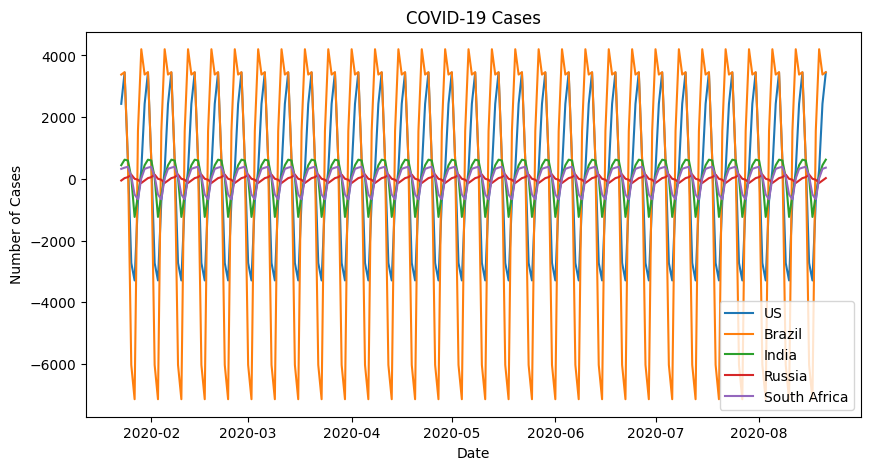

In [15]:
plot_data(seasonal_df)

## b) [5 points]

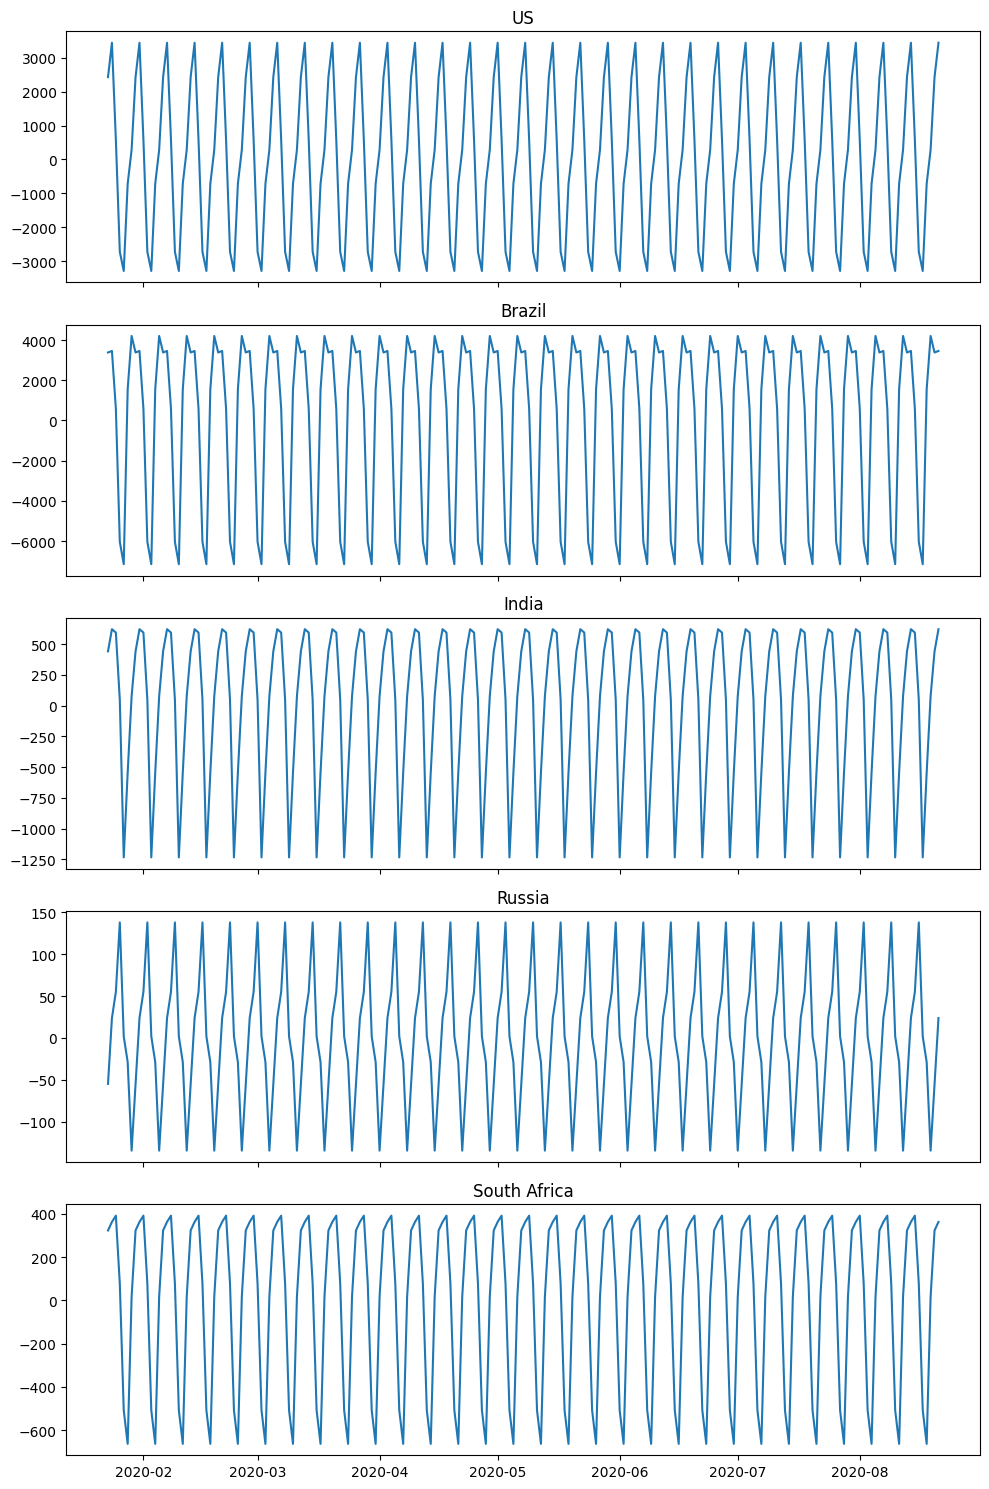

In [16]:
# plot one line for each country, 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
for i, country in enumerate(seasonal_df.columns):
    axes[i].plot(seasonal_df[country])
    axes[i].set_title(country)
plt.tight_layout()
plt.show()

We plotted the seasonal components of number of daily cases for each of the 5 countries.

# 3. Time Series Similarities [40 points]


## 3.1 Euclidean Distance [20 points]

### a) [15 points]

In [20]:
# Complete a function, ‘calc_euclidean_dist’, that accepts a `pd.DataFrame`,
# whose columns are time series for each country, and that returns all pairwise Euclidean
# Distance among these time series

def calc_euclidean_dist(covid):
    index = covid.columns
    dist_df = pd.DataFrame(index=index, columns=index)
    for country in covid.columns:
        for country2 in covid.columns:
            dist_df[country][country2] = (np.sqrt(np.sum(
                np.square(covid[country2] - covid[country]), axis=0)))

    return dist_df

calc_euclidean_dist(covid)

,US,Brazil,India,Russia,South Africa
,,,,,
US,0.0,233760.757213,272344.138927,433638.331574,436238.175972
Brazil,233760.757213,0.0,178779.66374,306032.283923,304919.698741
India,272344.138927,178779.66374,0.0,316862.76763,303936.538967
Russia,433638.331574,306032.283923,316862.76763,0.0,67392.593681
South Africa,436238.175972,304919.698741,303936.538967,67392.593681,0.0


### b) [5 points]

In [21]:
euc_dist = calc_euclidean_dist(seasonal_df)
euc_dist

,US,Brazil,India,Russia,South Africa
US,0.0,37616.752035,27032.887714,33986.305519,30084.544171
Brazil,37616.752035,0.0,57583.437987,63663.896821,60839.376478
India,27032.887714,57583.437987,0.0,9102.412727,4490.020448
Russia,33986.305519,63663.896821,9102.412727,0.0,5658.222387
South Africa,30084.544171,60839.376478,4490.020448,5658.222387,0.0


## 3.2 Cosine Similarity [20 points]

### a) [15 points]

In [23]:
# Complete a function, ‘calc_cos_sim’, that accepts a `pd.DataFrame`, whose
# columns are the time series for each country, and that returns all pairwise Cosine Similarity
# among these time series

def calc_cos_sim(covid):
    index = covid.columns
    cos_df = pd.DataFrame(index=index, columns=index)
    for country in covid.columns:
        for country2 in covid.columns:
            cos_df[country][country2] = \
            (np.dot(covid[country2], covid[country]) /
            (np.linalg.norm(covid[country2]) * np.linalg.norm(covid[country])))

    return cos_df

calc_cos_sim(covid)

,US,Brazil,India,Russia,South Africa
,,,,,
US,1.0,0.898664,0.84716,0.80474,0.884909
Brazil,0.898664,1.0,0.878452,0.763523,0.871214
India,0.84716,0.878452,1.0,0.590388,0.809944
Russia,0.80474,0.763523,0.590388,1.0,0.638246
South Africa,0.884909,0.871214,0.809944,0.638246,1.0


### b) [5 points]

In [24]:
cos_sim = calc_cos_sim(seasonal_df)
cos_sim

,US,Brazil,India,Russia,South Africa
US,1.0,0.868859,0.783851,-0.325065,0.664261
Brazil,0.868859,1.0,0.632741,-0.629987,0.403198
India,0.783851,0.632741,1.0,0.092292,0.917529
Russia,-0.325065,-0.629987,0.092292,1.0,0.174437
South Africa,0.664261,0.403198,0.917529,0.174437,1.0


# 4. Dynamic Time Warping (DTW) Cost [25 points]

## 4.1 Define a Function to Calculate DTW Cost [10 points]

### a) [10 points]

In [25]:
# implement a function, ‘calc_pairwise_dtw_cost’, 
# that computes the Dynamic Time Warping DTW cost for two time series.

def calc_pairwise_dtw_cost(X, Y, ret_matrix):
    # create a cost matrix
    cost_matrix = np.zeros((len(X), len(Y)))
    # fill the first row and column
    cost_matrix[0, 0] = (X[0] - Y[0])**2
    for i in range(1, len(X)):
        cost_matrix[i, 0] = cost_matrix[i-1, 0] + (X[i] - Y[0])**2
    for j in range(1, len(Y)):
        cost_matrix[0, j] = cost_matrix[0, j-1] + (X[0] - Y[j])**2
    # fill the rest of the matrix
    for i in range(1, len(X)):
        for j in range(1, len(Y)):
            cost_matrix[i, j] = (X[i] - Y[j])**2 + \
            min(cost_matrix[i-1, j], cost_matrix[i, j-1], cost_matrix[i-1, j-1])

    if ret_matrix:
        return cost_matrix
    else:
        # return the last element of the matrix
        return cost_matrix[-1, -1]

## 4.2 Compute Pairwise DTW Cost [15 points]

### a) [10 points]

In [26]:
# Complete a function, ‘calc_dtw_cost’, that accepts a `pd.DataFrame`, whose
# columns are the time series for each country, and that returns all pairwise DTW Distance
# among these time series

def calc_dtw_cost(covid):
    index = covid.columns
    dtw_df = pd.DataFrame(index=index, columns=index)
    for country in covid.columns:
        for country2 in covid.columns:
            dtw_df[country][country2] \
                = calc_pairwise_dtw_cost(covid[country2], covid[country], False)

    return dtw_df

In [27]:
calc_dtw_cost(covid)

,US,Brazil,India,Russia,South Africa
,,,,,
US,0.0,9575974038.0,5187397134.0,174074662446.0,139515939601.0
Brazil,9575974038.0,0.0,14309884215.0,83618108875.0,65427030728.0
India,5187397134.0,14309884215.0,0.0,99276257414.0,87289503477.0
Russia,174074662446.0,83618108875.0,99276257414.0,0.0,163867116.0
South Africa,139515939601.0,65427030728.0,87289503477.0,163867116.0,0.0


### b) [5 points] 

In [38]:
# use this function to calculate the pairwise DTW costs between seasonal
# patterns. take the square root so that we can compare it with the Euclidean Distance.
# takes about 30 seconds to run

dtw = calc_dtw_cost(seasonal_df)

In [39]:
dtw

,US,Brazil,India,Russia,South Africa
US,0.0,1016218295.595645,555353942.818118,1045061751.973515,784925121.803171
Brazil,1016218295.595645,0.0,2851644273.689343,3827651121.885218,3265345080.132234
India,555353942.818118,2851644273.689343,0.0,59099617.140716,19922165.962264
Russia,1045061751.973515,3827651121.885218,59099617.140716,0.0,18139901.880343
South Africa,784925121.803171,3265345080.132234,19922165.962264,18139901.880343,0.0


In [41]:
# sqrt the dtw matrix except Index column
dtw_sqrt = dtw.copy()

for i in range(0, len(dtw_sqrt)):
    for j in range(0, len(dtw_sqrt)):
        dtw_sqrt.iloc[i][j] = np.sqrt(dtw_sqrt.iloc[i][j]).round(3)

In [42]:
dtw_sqrt

,US,Brazil,India,Russia,South Africa
US,0.0,31878.179,23565.949,32327.415,28016.515
Brazil,31878.179,0.0,53400.789,61868.014,57143.198
India,23565.949,53400.789,0.0,7687.628,4463.425
Russia,32327.415,61868.014,7687.628,0.0,4259.096
South Africa,28016.515,57143.198,4463.425,4259.096,0.0


From these analysis, we can conclude that:
- India, Russia and South Africa have similar seasonal patterns. This is be because their Euclidean and DTW distances are less.
- The seasonal patterns of US and Brazil are different from the rest.
- I have plotted a heat map of Euclidean distance, Cosine Similarity and DTW distance below.
- The plot show that Euclidean Distance and DTW Cost calculations tell almost the same story.

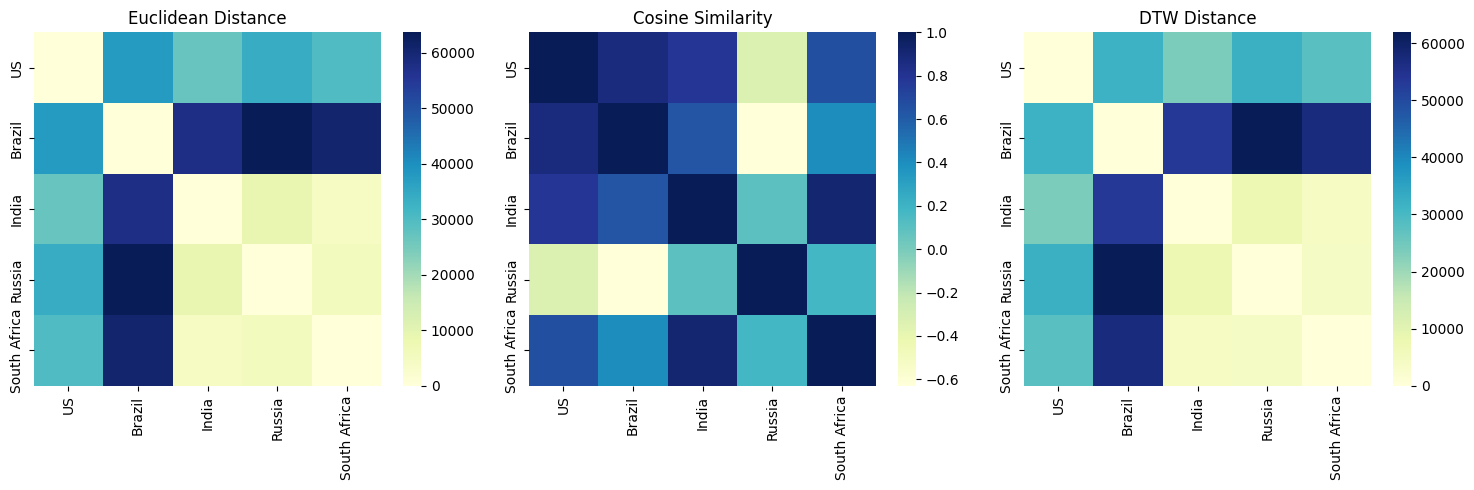

In [43]:
# 3 subplots of heatmaps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(euc_dist.astype(float), cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Euclidean Distance")
sns.heatmap(cos_sim.astype(float), cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Cosine Similarity")
sns.heatmap(dtw_sqrt.astype(float), cmap='YlGnBu', ax=axes[2])
axes[2].set_title("DTW Distance")
plt.tight_layout()
plt.show()